<a href="https://colab.research.google.com/github/kkleong17/Applied-Data-2-Colab/blob/main/Formative_Assessment_completed_kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADS2 Formative Assessment

The goal of this assessment is to demonstrate your Python and PySpark skills. There are three exercises. In the first two, you will be tested on data input/output, clustering analysis, use of functions, and visualisation. For the final exercise, you will also be tested on DataFrame loading, Spark SQL and DataFrame saving.

# Exercise 1 - Data Input/Output (10 marks)

For this exercise, you will use the California Housing Dataset seen in the PC labs. Use the version of this dataset found in the Google Colab "sample_data" folder.

`/content/sample_data/california_housing_train.csv`
`/content/sample_data/california_housing_test.csv`

Complete the following tasks:

1.   Using your preferred method–e.g. Pandas or csv reader—load the `california_housing_train.csv` from the file.
2.   Separate out the longitude, latitude, median_income and median_house_value columns, and discard the rest of the data.
3.   Normalise the longitude, latitude and median_income columns—for example, you could use the [StandardScalar from SciKit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Add these columns onto the rest of the data
4.   Save a new .csv file with the data. It should have seven columns:
    1. longitude
    2. latitude
    3. median_income
    4. normalised_longitude
    5. normalised_latitude
    6. normalised_income
    7. median_house_income



In [27]:
### Load the california_housing_train.csv
import pandas as pd

california_housing = '/content/sample_data/california_housing_train.csv'

df = pd.read_csv(california_housing)
df['latitude']

0        34.19
1        34.40
2        33.69
3        33.64
4        33.57
         ...  
16995    40.58
16996    40.69
16997    41.84
16998    41.80
16999    40.54
Name: latitude, Length: 17000, dtype: float64

In [28]:
### Discard all data except longitude, latitude, median_income and
### median_house_value



def discarding(x):
### instead of dropping the columns one by one, i am going to use filter instead 
### to select the columns that i want.

  x = x.filter(['longitude',
                'latitude',
                'median_income',
                'median_house_value']
               )
  return x

housingdf = discarding(df) #apply my function from above



In [29]:
### Normalise the longitude, latitude and median_income data, add these
### as new columns

def normalize(x):
  # x - mean / std
    return (x - x.mean()) / x.std()


def renamed(x):
  # renaming using pd.rename for the selected columns

  x = x.rename({'longitude':'norm_longitude',
                'latitude':'norm_latitude',
                'median_income':'norm_median_income'},
                 axis=1,)
  return x

selected_housing_df = housingdf[['longitude',
                                 'latitude',
                                 'median_income']] # selecting the columns i want

rename_selected = renamed(selected_housing_df)  # apply the renaming function 
norm_and_rename_df = normalize(rename_selected) # apply the normalization function


final_house_df = pd.concat([housingdf,norm_and_rename_df] , axis=1) #finally add them together
final_house_df



,longitude,latitude,median_income,median_house_value,norm_longitude,norm_latitude,norm_median_income
0,-114.31,34.19,1.4936,66900.0,2.619288,-0.671500,-1.252506
1,-114.47,34.40,1.8200,80100.0,2.539494,-0.573248,-1.081451
2,-114.56,33.69,1.6509,85700.0,2.494610,-0.905436,-1.170071
3,-114.57,33.64,3.1917,73400.0,2.489623,-0.928830,-0.362590
4,-114.57,33.57,1.9250,65500.0,2.489623,-0.961581,-1.026424
...,...,...,...,...,...,...,...
16995,-124.26,40.58,2.3571,111400.0,-2.342894,2.318197,-0.799975
16996,-124.27,40.69,2.5179,79000.0,-2.347881,2.369663,-0.715705
16997,-124.30,41.84,3.0313,103600.0,-2.362842,2.907715,-0.446650
16998,-124.30,41.80,1.9797,85800.0,-2.362842,2.889000,-0.997758


In [30]:
### Save the data to a .csv file

final_house_df.to_csv('/content/exercise_1.csv')

# Exercise 2 - Cluserting Analysis (10 marks)

In this exercise, you will analyse the housing data and create a classification system using the K Means algorithm.

Complete the following tasks:
1.   Create a KMeans model using sklearn, with six clusters. Fit the model to the normalised longitude, latitude and median_income data.
2.   Predict the clusters for each sample of data. Create a function that takes in all the samples for one cluster, and returns the mean, median and standard deviation of the median_house_value.
3.   Create a function which makes a scatter plot where the x-axis is longitude, the y-axis is latitude, the marker size represents median_income, and the marker colour denotes the cluster. Call the function with the sample data and predicted clusters.

In [53]:
### Fit a Kmeans clustering model to the normalised longitude,
### latitude and median_income data
from sklearn import cluster
import seaborn as sns 
import numpy as np
%matplotlib inline

kmeans  = cluster.KMeans(n_clusters = 6)

kmeans_model = kmeans.fit(norm_and_rename_df[['norm_longitude',
                                              'norm_latitude',
                                              'norm_median_income']]
                          )

final_house_df['clusters'] = kmeans_model.labels_

final_house_df

,longitude,latitude,median_income,median_house_value,norm_longitude,norm_latitude,norm_median_income,clusters
0,-114.31,34.19,1.4936,66900.0,2.619288,-0.671500,-1.252506,0
1,-114.47,34.40,1.8200,80100.0,2.539494,-0.573248,-1.081451,0
2,-114.56,33.69,1.6509,85700.0,2.494610,-0.905436,-1.170071,0
3,-114.57,33.64,3.1917,73400.0,2.489623,-0.928830,-0.362590,0
4,-114.57,33.57,1.9250,65500.0,2.489623,-0.961581,-1.026424,0
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,2.3571,111400.0,-2.342894,2.318197,-0.799975,1
16996,-124.27,40.69,2.5179,79000.0,-2.347881,2.369663,-0.715705,1
16997,-124.30,41.84,3.0313,103600.0,-2.362842,2.907715,-0.446650,1
16998,-124.30,41.80,1.9797,85800.0,-2.362842,2.889000,-0.997758,1


In [32]:
### Create a function that calculates the mean, median and standard deviation
### of median_house_value for one cluster of data samples. Call it for each
### cluster and display the results

def calculation(x,n):
  
 """ first line i extract clusters and put it equal to category of cluster
 then second line is extracting the column for median house value and the last 3
 functions are for calculating the median,standard deviation and mean and finally
 printing them """

 
 x = x.loc[x['clusters'] == n]
 s = x[['median_house_value']]
 tmean = s.mean()
 tstd = s.std()
 tmedian = s.median()

 print(f"cluster {n} mean of : {tmean} , standard deviation of : {tstd} , median of : {tmedian}")

for p in range(6):
  print(calculation(final_house_df,p)) # for loop for different labels range 6

cluster 0 mean of : median_house_value    270259.307167
dtype: float64 , standard deviation of : median_house_value    102041.244672
dtype: float64 , median of : median_house_value    244200.0
dtype: float64
None
cluster 1 mean of : median_house_value    288309.571685
dtype: float64 , standard deviation of : median_house_value    104984.013838
dtype: float64 , median of : median_house_value    271450.0
dtype: float64
None
cluster 2 mean of : median_house_value    157191.112182
dtype: float64 , standard deviation of : median_house_value    87331.594361
dtype: float64 , median of : median_house_value    134500.0
dtype: float64
None
cluster 3 mean of : median_house_value    104124.928144
dtype: float64 , standard deviation of : median_house_value    69166.233275
dtype: float64 , median of : median_house_value    80600.0
dtype: float64
None
cluster 4 mean of : median_house_value    172384.363721
dtype: float64 , standard deviation of : median_house_value    81896.745631
dtype: float64 , me

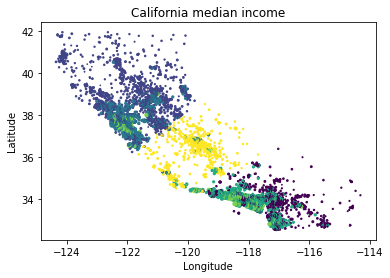

In [63]:
### Create a function that plots the longitude and latitude of each data sample
### Use the median_income for the marker size and cluster label for the colour
import matplotlib.pyplot as plt


def plotting(df):
  """ plot scatter with my marker size 's' as the median income and my marker color 'c'
  as the clusters labels from my first question exercise 2  """

  
  plt.scatter(df['longitude'],df['latitude'],s = df['median_income'],c=df['clusters'])

  plt.title("California median income") #set labels
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")

plotting(final_house_df) 







# Exercise 3 - PySpark Skills Test

In this exercise, you will use PySpark to process some data. Run the code to install PySpark, then complete these exercises:

1.   Load the `titanic3.csv` file into a DataFrame with an inferred schema. Show the first 20 lines,  and print the schema.
2.   Convert the `'Age'` column to `interger` type.
3.   Drop any rows that have null values.
4.   The buying power of £100 in 1912 is equivalent to £12,170.45 in 2022. Create a new column that shows the fare prices in today's money, and add it to the DataFrame.
5.   Save the new DataFrame to a .csv.

In [34]:
# Apache Spark uses Java, so first we must install that
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [35]:
# Download and unpack the latest version of Spark (3.2.0 as of writing)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [36]:
# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [37]:
# Install findspark, which helps python locate the psyspark module files
!pip install -q findspark
import findspark
findspark.init()

In [38]:
# Finally, we initialse a "SparkSession", which handles the computations
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [39]:
### Load the titanic3.csv file as a DataFrame. Display the data and schema

csvpath = '/content/titanic3.csv' # my path file

#using .read .option for reading header and predicting column type with inferschema
titanic_df = (spark
            .read
            .option('header',True)
            .option('inferSchema',True)
            .csv(csvpath)
            )

titanic_df.show()
titanic_df.printSchema()

+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+
|Survived|Pclass|                Name|   Sex|Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|
+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+
|       0|     3|Mr. Owen Harris B...|  male| 22|                      1|                      0|   7.25|
|       1|     1|Mrs. John Bradley...|female| 38|                      1|                      0|71.2833|
|       1|     3|Miss. Laina Heikk...|female|  ?|                      0|                      0|  7.925|
|       1|     1|Mrs. Jacques Heat...|female| 35|                      1|                      0|   53.1|
|       0|     3|Mr. William Henry...|  male| 35|                      0|                      0|   8.05|
|       0|     3|     Mr. James Moran|  male| 27|                      0|                      0| 8.4583|
|       0|     1|Mr. Timothy J McC...|  male| 

In [40]:
### Convert the Age column to interger type
from pyspark.sql.functions import col

titanic_df.select(col("Age").cast('int'))

titanic_df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Siblings/Spouses Aboard: integer (nullable = true)
 |-- Parents/Children Aboard: integer (nullable = true)
 |-- Fare: double (nullable = true)



In [41]:
### Discard any rows with null values


titanic_df.na.drop().show()

+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+
|Survived|Pclass|                Name|   Sex|Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|
+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+
|       0|     3|Mr. Owen Harris B...|  male| 22|                      1|                      0|   7.25|
|       1|     1|Mrs. John Bradley...|female| 38|                      1|                      0|71.2833|
|       1|     3|Miss. Laina Heikk...|female|  ?|                      0|                      0|  7.925|
|       1|     1|Mrs. Jacques Heat...|female| 35|                      1|                      0|   53.1|
|       0|     3|Mr. William Henry...|  male| 35|                      0|                      0|   8.05|
|       0|     3|     Mr. James Moran|  male| 27|                      0|                      0| 8.4583|
|       0|     1|Mr. Timothy J McC...|  male| 

In [42]:
### Create a column with the fare prices in "today's money"

#using withColumn function with a column name set and then calculate the fare
#based on the instruction given 
titanic_df.withColumn("today's_money", titanic_df.Fare*12170.45/100).show()


+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+------------------+
|Survived|Pclass|                Name|   Sex|Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|     today's_money|
+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+------------------+
|       0|     3|Mr. Owen Harris B...|  male| 22|                      1|                      0|   7.25| 882.3576250000001|
|       1|     1|Mrs. John Bradley...|female| 38|                      1|                      0|71.2833| 8675.498384850001|
|       1|     3|Miss. Laina Heikk...|female|  ?|                      0|                      0|  7.925|       964.5081625|
|       1|     1|Mrs. Jacques Heat...|female| 35|                      1|                      0|   53.1|        6462.50895|
|       0|     3|Mr. William Henry...|  male| 35|                      0|                      0|   8.05| 979.7212250000001|


In [54]:
### Save the DataFrame as a .csv

#saving it with write.option way instead of pandas 
titanic_df.write.option('header',True).option('delimiter',',').csv("/content/titanic_df.csv")


AnalysisException: ignored